#Deep Computer Vision

In this project we will peform *image classification and object detection/recognition* using deep computer vision with something called a **convolutional neural network**.

The goal of our convolutional neural networks will be to classify and detect images or specific objects from within the image. We will be using image data as our features and a label for those images as our label or output.

We will also discuss following concepts.
- Image Data
- Convolutional Layer
- Pooling Layer
- CNN Architectures

The major differences we are about to see in these types of neural networks are the layers that make them up.

##Image Data
We will deal with image data that is made up of 3 dimensions. These 3 dimensions are as follows:
- image height
- image width
- color channels

The number of color channels represents the depth of an image and coorelates to the colors used in it. For example, an image with three channels is likely made up of rgb (red, green, blue) pixels. So, for each pixel we have three numeric values in the range 0-255 that define its color. For an image of color depth 1 we would likely have a greyscale image with one value defining each pixel, again in the range of 0-255.

![alt text](http://xrds.acm.org/blog/wp-content/uploads/2016/06/Figure1.png)





##Convolutional Neural Network
**Note:** we will use the term *convnet* and convolutional neural network interchangably.

Each convolutional neural network is made up of one or many convolutional layers. These layers are different than the *dense* layers we have seen previously. Their goal is to find patterns from within images that can be used to classify the image or parts of it. 

The fundemental difference between a dense layer and a convolutional layer is that dense layers detect patterns globally while convolutional layers detect patterns locally. When we have a densly connected layer each node in that layer sees all the data from the previous layer. This means that this layer is looking at all the information and is only capable of analyzing the data in a global capacity. Our convolutional layer however will not be densly connected, this means it can detect local patterns using part of the input data to that layer.

*Let's have a look at how a densly connected layer would look at an image vs how a convolutional layer would.*

This is our image; the goal of our network will be to determine whether this image is a cat or not.
![alt text](https://img.webmd.com/dtmcms/live/webmd/consumer_assets/site_images/article_thumbnails/reference_guide/cat_weight_ref_guide/1800x1200_cat_weight_ref_guide.jpg)

**Dense Layer:** A dense layer will consider the ENTIRE image. It will look at all the pixels and use that information to generate some output.

**Convolutional Layer:** The convolutional layer will look at specific parts of the image. In this example let's say it analyzes the highlighted parts below and detects patterns there.
![alt text](https://drive.google.com/uc?export=view&id=1M7v7S-b-zisFLI_G4ZY_RdUJQrGpJ3zt)

we see why this might make these networks more useful?




###How They Work
A dense neural network learns patterns that are present in one specific area of an image. This means if a pattern that the network knows is present in a different area of the image it will have to learn the pattern again in that new area to be able to detect it. 

*Let's use an example to better illustrate this.*

We'll consider that we have a dense neural network that has learned what an eye looks like from a sample of dog images.

![alt text](https://drive.google.com/uc?export=view&id=16FJKkVS_lZToQOCOOy6ohUpspWgtoQ-c)

Let's say it's determined that an image is likely to be a dog if an eye is present in the boxed off locations of the image above.

Now let's flip the image.
![alt text](https://drive.google.com/uc?export=view&id=1V7Dh7BiaOvMq5Pm_jzpQfJTZcpPNmN0W)

Since our densly connected network has only recognized patterns globally it will look where it thinks the eyes should be present. Clearly it does not find them there and therefore would likely determine this image is not a dog. Even though the pattern of the eyes is present, it's just in a different location.

Since convolutional layers learn and detect patterns from different areas of the image, they don't have problems with the example we just illustrated. They know what an eye looks like and by analyzing different parts of the image can find where it is present. 



###Multiple Convolutional Layers
In CNN models it is quite common to have more than one convolutional layer. These layers work together by increasing complexity and abstraction at each subsequent layer. The first layer might be responsible for picking up edges and short lines, while the second layer will take as input these lines and start forming shapes or polygons. Finally, the last layer might take these shapes and determine which combiantions make up a specific image.





##Feature Maps
This term simply stands for a 3D tensor with two spacial axes (width and height) and one depth axis. Convolutional layers take feature maps as their input and return a new feature map that reprsents the prescence of spcific filters from the previous feature map. These are what we call *response maps*.

##Layer Parameters
A convolutional layer is defined by two key parameters.

####**Filters**
A filter is a m x n pattern of pixels that we are looking for in an image. The number of filters in a convolutional layer reprsents how many patterns each layer is looking for and what the depth of our response map will be. If we are looking for 32 different patterns/filters than our output feature map (aka the response map) will have a depth of 32. Each one of the 32 layers of depth will be a matrix of some size containing values indicating if the filter was present at that location or not.

Here's a great illustration from the book "Deep Learning with Python" by Francois Chollet (pg 124).
![alt text](https://drive.google.com/uc?export=view&id=1HcLvvLKvLCCGuGZPMvKYz437FbbCC2eB)

####**Sample Size**
This isn't really the best term to describe this, but each convolutional layer is going to examine n x m blocks of pixels in each image. Typically, we'll consider 3x3 or 5x5 blocks. In the example above we use a 3x3 "sample size". This size will be the same as the size of our filter. 

Our layers work by sliding these filters of n x m pixels over every possible position in our image and populating a new feature map/response map indicating whether the filter is present at each location. 




##Borders and Padding
The more mathematical of we have realized that if we slide a filter of let's say size 3x3 over our image well consider less positions for our filter than pixels in our input. Look at the example below. 

*Image from "Deep Learning with Python" by Francois Chollet (pg 126).*
![alt text](https://drive.google.com/uc?export=view&id=1OEfXrV16NBjwAafgBfYYcWOyBCHqaZ5M)

This means our response map will have a slightly smaller width and height than our original image. This is fine but sometimes we want our response map to have the same dimensions. We can accomplish this by using something called *padding*.

**Padding** is simply the addition of the appropriate number of rows and/or columns to your input data such that each pixel can be centered by the filter.

##Strides
 The stride size reprsents how many rows/cols we will move the filter each time.

##Pooling
We know that our convnets are made up of a stack of convolution and pooling layers.

The idea behind a pooling layer is to downsample our feature maps and reduce their dimensions. They work in a similar way to convolutional layers where they extract windows from the feature map and return a response map of the max, min or average values of each channel. Pooling is usually done using windows of size 2x2 and a stride of 2. This will reduce the size of the feature map by a factor of two and return a response map that is 2x smaller.

##Creating a Convnet

Lets create our first convnet.


###Dataset
The problem we will consider here is classifying 10 different everyday objects. The dataset we will use is built into tensorflow and called the [**CIFAR Image Dataset.**](https://www.cs.toronto.edu/~kriz/cifar.html) It contains 60,000 32x32 color images with 6000 images of each class. 

The labels in this dataset are the following:
- Airplane
- Automobile
- Bird
- Cat
- Deer
- Dog
- Frog
- Horse
- Ship
- Truck

We'll load the dataset and have a look at some of the images below.




##  Techniques Used 

  1 Basic CNN

  2 Keras Tunner

  3 Transfer Learning
  
  4 Image Generator

## 1 Basic CNN

In [ ]:

import keras 
from keras.datasets import cifar10 
from keras.models import Sequential 
from keras.layers import Dense, Dropout, Activation, Flatten 
from keras.layers import Conv2D, MaxPooling2D 
#import os

import numpy as np

import seaborn as sns 
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#  LOAD AND SPLIT DATASET
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

##looking at the data
To verify that the dataset looks correct, let's plot the first 25 images from the training set and display the class name below each image.

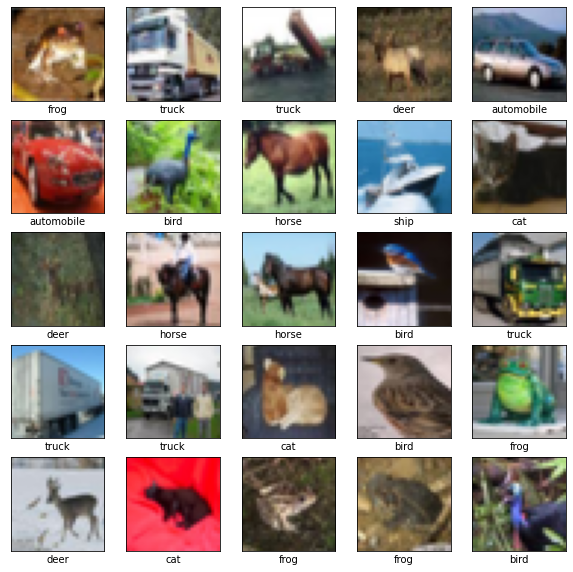

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [ ]:
batch_size = 32  # The default batch size of keras.
num_classes = 10  # Number of class for the dataset
epochs = 20
data_augmentation = False

In [ ]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

170500096/170498071 [==============================] - 2s 0us/step
x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
50000 train samples
10000 test samples


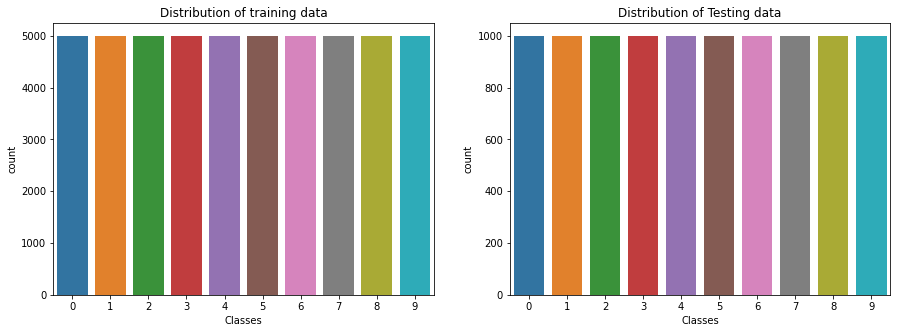

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(15,5)) 
# Count plot for training set
sns.countplot(y_train.ravel(), ax=axs[0])
axs[0].set_title('Distribution of training data')
axs[0].set_xlabel('Classes')
# Count plot for testing set
sns.countplot(y_test.ravel(), ax=axs[1])
axs[1].set_title('Distribution of Testing data')
axs[1].set_xlabel('Classes')
plt.show()

In [ ]:
# Normalize the data. Before we need to connvert data type to float for computation.
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Convert class vectors to binary class matrices. This is called one hot encoding.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
#define the convnet
model = Sequential()
# CONV => RELU => CONV => RELU => POOL => DROPOUT
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# CONV => RELU => CONV => RELU => POOL => DROPOUT
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# FLATTERN => DENSE => RELU => DROPOUT
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
# a softmax classifier
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)       

In [ ]:
# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [ ]:
history = None  # For recording the history of trainning process.

history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)


Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 16s 326us/step - loss: 1.8050 - accuracy: 0.3376 - val_loss: 1.5158 - val_accuracy: 0.4466
Epoch 2/20
50000/50000 [==============================] - 10s 200us/step - loss: 1.4835 - accuracy: 0.4607 - val_loss: 1.3557 - val_accuracy: 0.5163
Epoch 3/20
50000/50000 [==============================] - 10s 200us/step - loss: 1.3513 - accuracy: 0.5167 - val_loss: 1.2315 - val_accuracy: 0.5616
Epoch 4/20
50000/50000 [==============================] - 10s 201us/step - loss: 1.2574 - accuracy: 0.5541 - val_loss: 1.1498 - val_accuracy: 0.5891
Epoch 5/20
50000/50000 [==============================] - 10s 200us/step - loss: 1.1776 - accuracy: 0.5836 - val_loss: 1.0684 - val_accuracy: 0.6260
Epoch 6/20
50000/50000 [==============================] - 10s 197us/step - loss: 1.1178 - accuracy: 0.6071 - val_loss: 1.0540 - val_accuracy: 0.6261
Epoch 7/20
50000/50000 [==============================] 

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


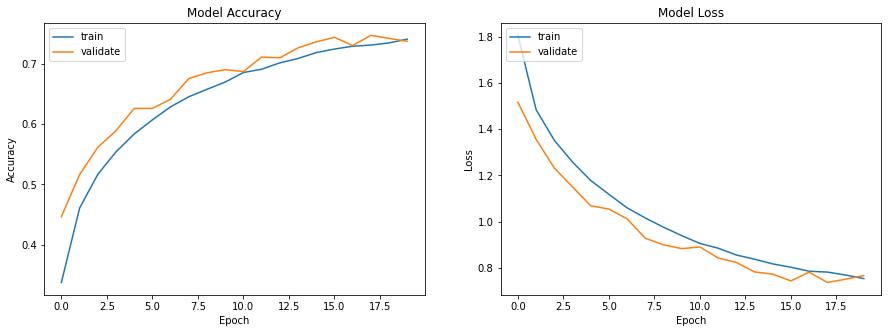

In [ ]:
def plotmodelhistory(history): 
    fig, axs = plt.subplots(1,2,figsize=(15,5)) 
    # summarize history for accuracy
    axs[0].plot(history.history['accuracy']) 
    axs[0].plot(history.history['val_accuracy']) 
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy') 
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
    axs[1].plot(history.history['loss']) 
    axs[1].plot(history.history['val_loss']) 
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss') 
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

# list all data in history
print(history.history.keys())

plotmodelhistory(history)

In [ ]:
# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

# make prediction.
pred = model.predict(x_test)

10000/10000 [==============================] - 1s 94us/step
Test loss: 0.7666609139442444
Test accuracy: 0.7373999953269958


##2 Keras Tunner

## Why do we need Keras tuner

Keras tunner helps us decide the model architecture, it is in a sense similar to randomsearch. It helps in hyper paramet tuning of CNN.

visit the link for more details

https://keras-team.github.io/keras-tuner/

In [ ]:
!pip install keras-tuner

     |████████████████████████████████| 61kB 2.4MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.1-cp36-none-any.whl size=73200 sha256=749eeca69c983749d505b264a5e232c2ba5eda760026a9ab540f78f8ede5dba1
  Stored in directory: /root/.cache/pip/wheels/b9/cc/62/52716b70dd90f3db12519233c3a93a5360bc672da1a10ded43
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp36-none-any.whl size=15356 sha256=b322a0a01cf1217d588003f21d53266f5e00640bac21fd131bb0ebe2b5c672a4
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
print(tf.__version__)

2.2.0


In [ ]:
from keras.utils import np_utils 
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


In [ ]:
import sys
np.set_printoptions(threshold=sys.maxsize)

In [ ]:

x_train = x_train / 255.0  #Since 255 is the maximum value in RGB, dividing by 255 expresses a 0-1 representation.
x_test = x_test / 255.0

#print(x_train[1])
#y_train = np_utils.to_categorical(y_train, 10)
#y_test = np_utils.to_categorical(y_test, 10)

In [ ]:
x_train=x_train.reshape(len(x_train),32,32,3)
x_test=x_test.reshape(len(x_test),32,32,3)
print(x_test)

##2.1

First, we define a model-building function. It takes an argument hp from which we can sample hyperparameters, such as hp.Int('units', min_value=32, max_value=512, step=32) (an integer from a certain range).

In [ ]:
def build_model(hp):  
  model = keras.Sequential([
    keras.layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        activation='relu',
        input_shape=(32,32,3)
    ),
    keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu'
    ),
    keras.layers.Dropout(0.50),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu'
    ),
    keras.layers.Dropout(0.50),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu'
    ),
    keras.layers.Dropout(0.50),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu'
    ),
    keras.layers.Dropout(0.50),
    keras.layers.BatchNormalization(),
    keras.layers.Flatten(),
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu'
    ),
    keras.layers.Dense(10, activation='softmax')
  ])
  
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-4, 1e-5])),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  
  return model

In [ ]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

 instantiating the tuner.

In [ ]:
tuner_search=RandomSearch(build_model,
                          objective='val_accuracy',
                          max_trials=10, directory='output',project_name="cifar10_005")

### The output looks in different format when run in Google colab

In [ ]:
tuner_search.search(x_train,y_train,epochs=5,validation_split=0.15)

Epoch 1/5
1329/1329 [==============================] - 26s 20ms/step - loss: 2.1679 - accuracy: 0.2400 - val_loss: 1.9489 - val_accuracy: 0.3097
Epoch 2/5
1329/1329 [==============================] - 26s 19ms/step - loss: 1.7241 - accuracy: 0.3659 - val_loss: 1.7352 - val_accuracy: 0.3632
Epoch 3/5
1329/1329 [==============================] - 26s 19ms/step - loss: 1.5699 - accuracy: 0.4241 - val_loss: 1.5312 - val_accuracy: 0.4391
Epoch 4/5
1329/1329 [==============================] - 26s 20ms/step - loss: 1.4467 - accuracy: 0.4733 - val_loss: 1.3757 - val_accuracy: 0.5037
Epoch 5/5
1329/1329 [==============================] - 26s 20ms/step - loss: 1.3480 - accuracy: 0.5157 - val_loss: 1.2194 - val_accuracy: 0.5683


Epoch 1/5
1329/1329 [==============================] - 39s 29ms/step - loss: 2.1422 - accuracy: 0.2753 - val_loss: 2.3301 - val_accuracy: 0.2779
Epoch 2/5
1329/1329 [==============================] - 38s 29ms/step - loss: 1.6421 - accuracy: 0.4098 - val_loss: 2.0405 - val_accuracy: 0.3353
Epoch 3/5
1329/1329 [==============================] - 38s 29ms/step - loss: 1.4696 - accuracy: 0.4704 - val_loss: 1.5812 - val_accuracy: 0.4631
Epoch 4/5
1329/1329 [==============================] - 38s 29ms/step - loss: 1.3709 - accuracy: 0.5086 - val_loss: 1.4048 - val_accuracy: 0.5177
Epoch 5/5
1329/1329 [==============================] - 38s 29ms/step - loss: 1.2779 - accuracy: 0.5460 - val_loss: 1.3004 - val_accuracy: 0.5549


Epoch 1/5
1329/1329 [==============================] - 23s 17ms/step - loss: 2.1931 - accuracy: 0.2297 - val_loss: 1.9524 - val_accuracy: 0.2837
Epoch 2/5
1329/1329 [==============================] - 22s 17ms/step - loss: 1.7761 - accuracy: 0.3443 - val_loss: 2.0447 - val_accuracy: 0.3059
Epoch 3/5
1329/1329 [==============================] - 22s 17ms/step - loss: 1.6155 - accuracy: 0.4048 - val_loss: 1.6177 - val_accuracy: 0.4183
Epoch 4/5
1329/1329 [==============================] - 22s 17ms/step - loss: 1.5074 - accuracy: 0.4491 - val_loss: 1.4856 - val_accuracy: 0.4748
Epoch 5/5
1329/1329 [==============================] - 23s 17ms/step - loss: 1.4211 - accuracy: 0.4829 - val_loss: 1.4877 - val_accuracy: 0.4789


Epoch 1/5
1329/1329 [==============================] - 28s 21ms/step - loss: 2.2182 - accuracy: 0.2243 - val_loss: 1.8292 - val_accuracy: 0.3035
Epoch 2/5
1329/1329 [==============================] - 27s 21ms/step - loss: 1.7594 - accuracy: 0.3522 - val_loss: 1.8838 - val_accuracy: 0.3315
Epoch 3/5
1329/1329 [==============================] - 27s 21ms/step - loss: 1.5813 - accuracy: 0.4229 - val_loss: 1.8010 - val_accuracy: 0.3937
Epoch 4/5
1329/1329 [==============================] - 27s 20ms/step - loss: 1.4773 - accuracy: 0.4628 - val_loss: 1.6233 - val_accuracy: 0.4368
Epoch 5/5
1329/1329 [==============================] - 27s 20ms/step - loss: 1.3861 - accuracy: 0.5008 - val_loss: 1.3390 - val_accuracy: 0.5392


Epoch 1/5
1329/1329 [==============================] - 28s 21ms/step - loss: 2.7656 - accuracy: 0.1212 - val_loss: 3.3336 - val_accuracy: 0.0987
Epoch 2/5
1329/1329 [==============================] - 28s 21ms/step - loss: 2.4381 - accuracy: 0.1664 - val_loss: 3.2623 - val_accuracy: 0.1123
Epoch 3/5
1329/1329 [==============================] - 28s 21ms/step - loss: 2.2479 - accuracy: 0.1956 - val_loss: 3.0075 - val_accuracy: 0.1221
Epoch 4/5
1329/1329 [==============================] - 28s 21ms/step - loss: 2.1263 - accuracy: 0.2249 - val_loss: 2.5800 - val_accuracy: 0.1631
Epoch 5/5
1329/1329 [==============================] - 28s 21ms/step - loss: 2.0201 - accuracy: 0.2643 - val_loss: 2.4199 - val_accuracy: 0.1929


Epoch 1/5
1329/1329 [==============================] - 35s 26ms/step - loss: 2.7201 - accuracy: 0.1332 - val_loss: 3.8795 - val_accuracy: 0.1001
Epoch 2/5
1329/1329 [==============================] - 35s 26ms/step - loss: 2.3037 - accuracy: 0.2111 - val_loss: 3.5924 - val_accuracy: 0.1303
Epoch 3/5
1329/1329 [==============================] - 35s 26ms/step - loss: 2.1269 - accuracy: 0.2544 - val_loss: 3.1926 - val_accuracy: 0.1476
Epoch 4/5
1329/1329 [==============================] - 35s 26ms/step - loss: 1.9992 - accuracy: 0.2909 - val_loss: 2.9390 - val_accuracy: 0.2009
Epoch 5/5
1329/1329 [==============================] - 35s 26ms/step - loss: 1.8966 - accuracy: 0.3251 - val_loss: 2.6911 - val_accuracy: 0.2247


Epoch 1/5
1329/1329 [==============================] - 34s 25ms/step - loss: 2.6959 - accuracy: 0.1529 - val_loss: 3.8701 - val_accuracy: 0.1021
Epoch 2/5
1329/1329 [==============================] - 33s 25ms/step - loss: 2.2839 - accuracy: 0.2252 - val_loss: 3.7866 - val_accuracy: 0.1233
Epoch 3/5
1329/1329 [==============================] - 34s 25ms/step - loss: 2.0881 - accuracy: 0.2726 - val_loss: 3.5941 - val_accuracy: 0.1431
Epoch 4/5
1329/1329 [==============================] - 34s 25ms/step - loss: 1.9790 - accuracy: 0.3054 - val_loss: 2.9718 - val_accuracy: 0.1829
Epoch 5/5
1329/1329 [==============================] - 34s 25ms/step - loss: 1.8818 - accuracy: 0.3328 - val_loss: 2.7813 - val_accuracy: 0.1943


Epoch 1/5
1329/1329 [==============================] - 23s 17ms/step - loss: 2.1624 - accuracy: 0.2361 - val_loss: 2.1524 - val_accuracy: 0.2483
Epoch 2/5
1329/1329 [==============================] - 22s 17ms/step - loss: 1.7617 - accuracy: 0.3505 - val_loss: 1.6602 - val_accuracy: 0.3945
Epoch 3/5
1329/1329 [==============================] - 22s 17ms/step - loss: 1.5807 - accuracy: 0.4212 - val_loss: 1.6533 - val_accuracy: 0.4168
Epoch 4/5
1329/1329 [==============================] - 22s 17ms/step - loss: 1.4856 - accuracy: 0.4578 - val_loss: 1.4142 - val_accuracy: 0.4787
Epoch 5/5
1329/1329 [==============================] - 22s 17ms/step - loss: 1.4033 - accuracy: 0.4923 - val_loss: 1.3717 - val_accuracy: 0.5116


Epoch 1/5
1329/1329 [==============================] - 32s 24ms/step - loss: 2.1434 - accuracy: 0.2613 - val_loss: 2.7655 - val_accuracy: 0.2184
Epoch 2/5
1329/1329 [==============================] - 31s 24ms/step - loss: 1.6866 - accuracy: 0.3971 - val_loss: 2.1659 - val_accuracy: 0.3168
Epoch 3/5
1329/1329 [==============================] - 31s 24ms/step - loss: 1.5136 - accuracy: 0.4499 - val_loss: 1.7007 - val_accuracy: 0.4243
Epoch 4/5
1329/1329 [==============================] - 31s 24ms/step - loss: 1.4004 - accuracy: 0.4971 - val_loss: 1.7350 - val_accuracy: 0.4459
Epoch 5/5
1329/1329 [==============================] - 31s 23ms/step - loss: 1.3108 - accuracy: 0.5314 - val_loss: 1.4634 - val_accuracy: 0.5119


Epoch 1/5
1329/1329 [==============================] - 33s 25ms/step - loss: 2.1350 - accuracy: 0.2729 - val_loss: 2.4062 - val_accuracy: 0.2551
Epoch 2/5
1329/1329 [==============================] - 33s 25ms/step - loss: 1.6535 - accuracy: 0.4074 - val_loss: 1.9469 - val_accuracy: 0.3661
Epoch 3/5
1329/1329 [==============================] - 33s 25ms/step - loss: 1.4657 - accuracy: 0.4755 - val_loss: 1.4678 - val_accuracy: 0.4943
Epoch 4/5
1329/1329 [==============================] - 33s 25ms/step - loss: 1.3449 - accuracy: 0.5179 - val_loss: 1.5281 - val_accuracy: 0.4968
Epoch 5/5
1329/1329 [==============================] - 33s 25ms/step - loss: 1.2535 - accuracy: 0.5529 - val_loss: 1.3466 - val_accuracy: 0.5425


INFO:tensorflow:Oracle triggered exit


In [ ]:
model=tuner_search.get_best_models(num_models=1)[0] # num_models=1 because we want the best model, if num_model=2 we will the second best model. [0] ecuse the models are stored in list.

In [ ]:
model.summary() # summary of the best model above

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 80)        6080      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 48)        96048     
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 48)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 24, 24, 48)        192       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 48)        57648     
_________________________________________________________________
dropout_1 (Dropout)          (None, 20, 20, 48)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 20, 20, 48)        1

In [ ]:
#fitting the model 
history=model.fit(x_train, y_train, epochs=10, batch_size=20, validation_split=0.15, initial_epoch=5)

Epoch 6/10
2125/2125 [==============================] - 34s 16ms/step - loss: 1.2240 - accuracy: 0.5636 - val_loss: 1.2043 - val_accuracy: 0.5821
Epoch 7/10
2125/2125 [==============================] - 34s 16ms/step - loss: 1.1592 - accuracy: 0.5890 - val_loss: 1.1830 - val_accuracy: 0.5821
Epoch 8/10
2125/2125 [==============================] - 34s 16ms/step - loss: 1.1023 - accuracy: 0.6091 - val_loss: 1.0905 - val_accuracy: 0.6116
Epoch 9/10
2125/2125 [==============================] - 34s 16ms/step - loss: 1.0536 - accuracy: 0.6247 - val_loss: 1.3796 - val_accuracy: 0.5511
Epoch 10/10
2125/2125 [==============================] - 34s 16ms/step - loss: 1.0113 - accuracy: 0.6421 - val_loss: 1.0086 - val_accuracy: 0.6432


In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 1.0236 - accuracy: 0.6399


[1.0236456394195557, 0.6399000287055969]

Accuracy of the model is 64%

# 2.2 making changes to layes of above model
 
Here decreasing the complexicity of model and increasing the epocs

In [ ]:
def build_model(hp):  
  model = keras.Sequential([
    keras.layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        activation='relu',
        input_shape=(32,32,3)
    ),
    keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu'
    ),
    keras.layers.Dropout(0.50),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu'
    ),
    keras.layers.Dropout(0.50),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu'
    ),
    keras.layers.Dropout(0.50),
    keras.layers.BatchNormalization(),
    keras.layers.Flatten(),
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu'
    ),
    keras.layers.Dense(10, activation='softmax')
  ])
  
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-4, 1e-5])),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  
  return model


from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

tuner_search=RandomSearch(build_model,
                          objective='val_accuracy',
                          max_trials=10, directory='output',project_name="cifar10_9")

In [ ]:
tuner_search.search(x_train,y_train,epochs=20,validation_split=0.15)



Epoch 1/20
1329/1329 [==============================] - 30s 23ms/step - loss: 2.5199 - accuracy: 0.1699 - val_loss: 2.5362 - val_accuracy: 0.1672
Epoch 2/20
1329/1329 [==============================] - 30s 22ms/step - loss: 2.1131 - accuracy: 0.2719 - val_loss: 2.0775 - val_accuracy: 0.2857
Epoch 3/20
1329/1329 [==============================] - 30s 22ms/step - loss: 1.9343 - accuracy: 0.3245 - val_loss: 1.8839 - val_accuracy: 0.3432
Epoch 4/20
1329/1329 [==============================] - 30s 22ms/step - loss: 1.8049 - accuracy: 0.3628 - val_loss: 1.7833 - val_accuracy: 0.3780
Epoch 5/20
1329/1329 [==============================] - 30s 22ms/step - loss: 1.6930 - accuracy: 0.3957 - val_loss: 1.6551 - val_accuracy: 0.4289
Epoch 6/20
1329/1329 [==============================] - 30s 22ms/step - loss: 1.6217 - accuracy: 0.4211 - val_loss: 1.5298 - val_accuracy: 0.4568
Epoch 7/20
1329/1329 [==============================] - 30s 23ms/step - loss: 1.5649 - accuracy: 0.4398 - val_loss: 1.5688 -

Epoch 1/20
1329/1329 [==============================] - 32s 24ms/step - loss: 2.5438 - accuracy: 0.1805 - val_loss: 2.5899 - val_accuracy: 0.1744
Epoch 2/20
1329/1329 [==============================] - 32s 24ms/step - loss: 2.1086 - accuracy: 0.2784 - val_loss: 2.2889 - val_accuracy: 0.2616
Epoch 3/20
1329/1329 [==============================] - 32s 24ms/step - loss: 1.9304 - accuracy: 0.3272 - val_loss: 1.9961 - val_accuracy: 0.3352
Epoch 4/20
1329/1329 [==============================] - 32s 24ms/step - loss: 1.8105 - accuracy: 0.3629 - val_loss: 1.9420 - val_accuracy: 0.3488
Epoch 5/20
1329/1329 [==============================] - 32s 24ms/step - loss: 1.7303 - accuracy: 0.3867 - val_loss: 1.7324 - val_accuracy: 0.4005
Epoch 6/20
1329/1329 [==============================] - 32s 24ms/step - loss: 1.6389 - accuracy: 0.4172 - val_loss: 1.6701 - val_accuracy: 0.4247
Epoch 7/20
1329/1329 [==============================] - 32s 24ms/step - loss: 1.5862 - accuracy: 0.4359 - val_loss: 1.6202 -

Epoch 1/20
1329/1329 [==============================] - 21s 16ms/step - loss: 2.0726 - accuracy: 0.3079 - val_loss: 1.9929 - val_accuracy: 0.3221
Epoch 2/20
1329/1329 [==============================] - 21s 16ms/step - loss: 1.5994 - accuracy: 0.4337 - val_loss: 1.4903 - val_accuracy: 0.4752
Epoch 3/20
1329/1329 [==============================] - 21s 15ms/step - loss: 1.4113 - accuracy: 0.4976 - val_loss: 1.6899 - val_accuracy: 0.4356
Epoch 4/20
1329/1329 [==============================] - 21s 15ms/step - loss: 1.2902 - accuracy: 0.5408 - val_loss: 1.4340 - val_accuracy: 0.5035
Epoch 5/20
1329/1329 [==============================] - 21s 16ms/step - loss: 1.1930 - accuracy: 0.5735 - val_loss: 1.2831 - val_accuracy: 0.5513
Epoch 6/20
1329/1329 [==============================] - 21s 15ms/step - loss: 1.1104 - accuracy: 0.6075 - val_loss: 1.3273 - val_accuracy: 0.5624
Epoch 7/20
1329/1329 [==============================] - 21s 16ms/step - loss: 1.0425 - accuracy: 0.6301 - val_loss: 1.1599 -

Epoch 1/20
1329/1329 [==============================] - 22s 17ms/step - loss: 2.5150 - accuracy: 0.1642 - val_loss: 2.3734 - val_accuracy: 0.1727
Epoch 2/20
1329/1329 [==============================] - 22s 16ms/step - loss: 2.1579 - accuracy: 0.2438 - val_loss: 1.9739 - val_accuracy: 0.2793
Epoch 3/20
1329/1329 [==============================] - 22s 16ms/step - loss: 1.9796 - accuracy: 0.2994 - val_loss: 1.8523 - val_accuracy: 0.3156
Epoch 4/20
1329/1329 [==============================] - 22s 16ms/step - loss: 1.8674 - accuracy: 0.3310 - val_loss: 1.8263 - val_accuracy: 0.3563
Epoch 5/20
1329/1329 [==============================] - 22s 17ms/step - loss: 1.7733 - accuracy: 0.3585 - val_loss: 1.6984 - val_accuracy: 0.3816
Epoch 6/20
1329/1329 [==============================] - 22s 17ms/step - loss: 1.7066 - accuracy: 0.3833 - val_loss: 1.6176 - val_accuracy: 0.4037
Epoch 7/20
1329/1329 [==============================] - 22s 16ms/step - loss: 1.6487 - accuracy: 0.4017 - val_loss: 1.5427 -

Epoch 1/20
1329/1329 [==============================] - 26s 20ms/step - loss: 1.9695 - accuracy: 0.3270 - val_loss: 1.6245 - val_accuracy: 0.4200
Epoch 2/20
1329/1329 [==============================] - 26s 19ms/step - loss: 1.5129 - accuracy: 0.4578 - val_loss: 1.5720 - val_accuracy: 0.4700
Epoch 3/20
1329/1329 [==============================] - 26s 19ms/step - loss: 1.3732 - accuracy: 0.5101 - val_loss: 1.4451 - val_accuracy: 0.5175
Epoch 4/20
1329/1329 [==============================] - 26s 19ms/step - loss: 1.2657 - accuracy: 0.5495 - val_loss: 1.5241 - val_accuracy: 0.5024
Epoch 5/20
1329/1329 [==============================] - 26s 19ms/step - loss: 1.1679 - accuracy: 0.5880 - val_loss: 1.2589 - val_accuracy: 0.5781
Epoch 6/20
1329/1329 [==============================] - 26s 19ms/step - loss: 1.0877 - accuracy: 0.6170 - val_loss: 1.2688 - val_accuracy: 0.5857
Epoch 7/20
1329/1329 [==============================] - 26s 19ms/step - loss: 1.0173 - accuracy: 0.6411 - val_loss: 1.2037 -

Epoch 1/20
1329/1329 [==============================] - 20s 15ms/step - loss: 2.6794 - accuracy: 0.1490 - val_loss: 2.3481 - val_accuracy: 0.1415
Epoch 2/20
1329/1329 [==============================] - 19s 15ms/step - loss: 2.2333 - accuracy: 0.2263 - val_loss: 2.2195 - val_accuracy: 0.2011
Epoch 3/20
1329/1329 [==============================] - 19s 15ms/step - loss: 2.0571 - accuracy: 0.2623 - val_loss: 2.0874 - val_accuracy: 0.2392
Epoch 4/20
1329/1329 [==============================] - 20s 15ms/step - loss: 1.9600 - accuracy: 0.2910 - val_loss: 1.9380 - val_accuracy: 0.2747
Epoch 5/20
1329/1329 [==============================] - 20s 15ms/step - loss: 1.8969 - accuracy: 0.3124 - val_loss: 1.9282 - val_accuracy: 0.2975
Epoch 6/20
1329/1329 [==============================] - 20s 15ms/step - loss: 1.8354 - accuracy: 0.3303 - val_loss: 1.9667 - val_accuracy: 0.2973
Epoch 7/20
1329/1329 [==============================] - 20s 15ms/step - loss: 1.7798 - accuracy: 0.3480 - val_loss: 1.8475 -

Epoch 1/20
1329/1329 [==============================] - 36s 27ms/step - loss: 1.9674 - accuracy: 0.3269 - val_loss: 1.9532 - val_accuracy: 0.3785
Epoch 2/20
1329/1329 [==============================] - 35s 27ms/step - loss: 1.5084 - accuracy: 0.4638 - val_loss: 1.5086 - val_accuracy: 0.4844
Epoch 3/20
1329/1329 [==============================] - 36s 27ms/step - loss: 1.3151 - accuracy: 0.5306 - val_loss: 1.4419 - val_accuracy: 0.5335
Epoch 4/20
1329/1329 [==============================] - 35s 27ms/step - loss: 1.1857 - accuracy: 0.5787 - val_loss: 1.2173 - val_accuracy: 0.5947
Epoch 5/20
1329/1329 [==============================] - 35s 27ms/step - loss: 1.0679 - accuracy: 0.6221 - val_loss: 1.0099 - val_accuracy: 0.6524
Epoch 6/20
1329/1329 [==============================] - 35s 26ms/step - loss: 0.9679 - accuracy: 0.6599 - val_loss: 1.0482 - val_accuracy: 0.6517
Epoch 7/20
1329/1329 [==============================] - 35s 26ms/step - loss: 0.8853 - accuracy: 0.6877 - val_loss: 0.9642 -

Epoch 1/20
1329/1329 [==============================] - 21s 16ms/step - loss: 2.0659 - accuracy: 0.2802 - val_loss: 1.7244 - val_accuracy: 0.3657
Epoch 2/20
1329/1329 [==============================] - 20s 15ms/step - loss: 1.6269 - accuracy: 0.4105 - val_loss: 1.4834 - val_accuracy: 0.4665
Epoch 3/20
1329/1329 [==============================] - 20s 15ms/step - loss: 1.4839 - accuracy: 0.4647 - val_loss: 1.5037 - val_accuracy: 0.4721
Epoch 4/20
1329/1329 [==============================] - 20s 15ms/step - loss: 1.3812 - accuracy: 0.5057 - val_loss: 1.3113 - val_accuracy: 0.5375
Epoch 5/20
1329/1329 [==============================] - 20s 15ms/step - loss: 1.2788 - accuracy: 0.5449 - val_loss: 1.2593 - val_accuracy: 0.5637
Epoch 6/20
1329/1329 [==============================] - 20s 15ms/step - loss: 1.1894 - accuracy: 0.5799 - val_loss: 1.2727 - val_accuracy: 0.5681
Epoch 7/20
1329/1329 [==============================] - 20s 15ms/step - loss: 1.1239 - accuracy: 0.6035 - val_loss: 1.1186 -

Epoch 1/20
1329/1329 [==============================] - 20s 15ms/step - loss: 2.6128 - accuracy: 0.1536 - val_loss: 2.3483 - val_accuracy: 0.1789
Epoch 2/20
1329/1329 [==============================] - 20s 15ms/step - loss: 2.2245 - accuracy: 0.2271 - val_loss: 2.2332 - val_accuracy: 0.2336
Epoch 3/20
1329/1329 [==============================] - 20s 15ms/step - loss: 2.0649 - accuracy: 0.2645 - val_loss: 2.0380 - val_accuracy: 0.2792
Epoch 4/20
1329/1329 [==============================] - 20s 15ms/step - loss: 1.9626 - accuracy: 0.2965 - val_loss: 1.8487 - val_accuracy: 0.3283
Epoch 5/20
1329/1329 [==============================] - 20s 15ms/step - loss: 1.8705 - accuracy: 0.3236 - val_loss: 1.8143 - val_accuracy: 0.3417
Epoch 6/20
1329/1329 [==============================] - 20s 15ms/step - loss: 1.7845 - accuracy: 0.3531 - val_loss: 1.7293 - val_accuracy: 0.3751
Epoch 7/20
1329/1329 [==============================] - 20s 15ms/step - loss: 1.7185 - accuracy: 0.3754 - val_loss: 1.6192 -

Epoch 1/20
1329/1329 [==============================] - 27s 20ms/step - loss: 1.9323 - accuracy: 0.3137 - val_loss: 1.6323 - val_accuracy: 0.4227
Epoch 2/20
1329/1329 [==============================] - 27s 20ms/step - loss: 1.5441 - accuracy: 0.4452 - val_loss: 1.6354 - val_accuracy: 0.4461
Epoch 3/20
1329/1329 [==============================] - 27s 20ms/step - loss: 1.3740 - accuracy: 0.5073 - val_loss: 1.2816 - val_accuracy: 0.5508
Epoch 4/20
1329/1329 [==============================] - 27s 20ms/step - loss: 1.2530 - accuracy: 0.5524 - val_loss: 1.1804 - val_accuracy: 0.5901
Epoch 5/20
1329/1329 [==============================] - 27s 20ms/step - loss: 1.1575 - accuracy: 0.5939 - val_loss: 1.1246 - val_accuracy: 0.6045
Epoch 6/20
1329/1329 [==============================] - 27s 20ms/step - loss: 1.0738 - accuracy: 0.6182 - val_loss: 1.1606 - val_accuracy: 0.5964
Epoch 7/20
1329/1329 [==============================] - 27s 20ms/step - loss: 1.0025 - accuracy: 0.6444 - val_loss: 1.0880 -

INFO:tensorflow:Oracle triggered exit


In [ ]:
model=tuner_search.get_best_models(num_models=1)[0]

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 112)       3136      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 64)        179264    
_________________________________________________________________
dropout (Dropout)            (None, 26, 26, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 64)        102464    
_________________________________________________________________
dropout_1 (Dropout)          (None, 22, 22, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 22, 22, 64)        2

In [ ]:
model.fit(x_train, y_train, epochs=30, batch_size=20, validation_split=0.15, initial_epoch=20)

Epoch 21/30
2125/2125 [==============================] - 51s 24ms/step - loss: 0.5531 - accuracy: 0.8040 - val_loss: 0.7997 - val_accuracy: 0.7472
Epoch 22/30
2125/2125 [==============================] - 50s 24ms/step - loss: 0.5101 - accuracy: 0.8190 - val_loss: 0.7863 - val_accuracy: 0.7519
Epoch 23/30
2125/2125 [==============================] - 50s 24ms/step - loss: 0.4827 - accuracy: 0.8299 - val_loss: 0.9300 - val_accuracy: 0.7228
Epoch 24/30
2125/2125 [==============================] - 51s 24ms/step - loss: 0.4512 - accuracy: 0.8390 - val_loss: 0.9874 - val_accuracy: 0.7192
Epoch 25/30
2125/2125 [==============================] - 50s 24ms/step - loss: 0.4237 - accuracy: 0.8480 - val_loss: 0.7933 - val_accuracy: 0.7492
Epoch 26/30
2125/2125 [==============================] - 50s 24ms/step - loss: 0.4097 - accuracy: 0.8537 - val_loss: 0.7989 - val_accuracy: 0.7612
Epoch 27/30
2125/2125 [==============================] - 50s 24ms/step - loss: 0.3886 - accuracy: 0.8624 - val_loss: 0

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.8377 - accuracy: 0.7644


[0.8377405405044556, 0.7644000053405762]

Accuracy of the model is 76.44%

##3 Transfer Learning

##Why called transfer learning??

Transfer learning (TL) is a research problem in machine learning (ML) that focuses on storing knowledge gained while solving one problem and applying it to a different but related problem. For example, knowledge gained while learning to recognize cars could apply when trying to recognize trucks.

Basically we keep the weights intact and change the input pic and output layer. We can also add our own layer after we replace the output layer of the pre trained model.

Visit this link for more details

https://keras.io/api/applications/#:~:text=Keras%20Applications%20are%20deep%20learning,They%20are%20stored%20at%20~%2F.

## 3.1 ResNET 50
ResNet-50 is a convolutional neural network that is 50 layers deep. We can load a pretrained version of the network trained on more than a million images from the ImageNet database [1]. The pretrained network can classify images into 1000 object categories, such as keyboard, mouse, pencil, and many animals. As a result, the network has learned rich feature representations for a wide range of images. The network has an image input size of 224-by-224.


In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input   # we importing the Resnet 50 
import tensorflow.keras as keras  # importing keras
from tensorflow.keras import models  # for model building
from tensorflow.keras import layers # for adding layers in model

from tensorflow.keras import optimizers  # for importing build in optimizers from tensorflow
#Optimizers are algorithms or methods used to change the attributes of your neural network such as weights and learning rate in order to reduce the losses.

import tensorflow as tf # importing tensorfloe library
from keras.utils import np_utils  #   used for different utilties eg for printing model, categoriging the labels.
from keras.models import load_model # 
from keras.datasets import cifar10  # loading cifar 10 dataset
from keras.preprocessing import image
import numpy as np  # importing numpy library
import matplotlib.pyplot as plt # importing matplolib library
#from PIL import Image
#import cv2

Using TensorFlow backend.


##Model Creation

Next, let's load ResNet50 with just the convolutional layers and not the dense layers so we can train our new dataset on the new dense layers that we create

In [ ]:
resnet_conv_base = ResNet50(weights='imagenet', # importing weights 
                     include_top=False, # the last layer of the ResNet model is not included
                     input_shape=(256, 256, 3)) # input shape of the image

94773248/94765736 [==============================] - 2s 0us/step


The summary shows the state of art architecture of the ResNet 50 model.

In [ ]:
resnet_conv_base.summary() 

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

Now lets see the shape of the model of ResNet 50

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()  # loading the dataset

x_train = x_train / 255.0  #Since 255 is the maximum value in RGB, dividing by 255 expresses a 0-1 representation.
x_test = x_test / 255.0

y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

print(x_train.shape)
print(x_test.shape)

170500096/170498071 [==============================] - 3s 0us/step
(50000, 32, 32, 3)
(10000, 32, 32, 3)


To train our model on the new dataset above, the architecture for everything besides the ResNet 50 portion has changed. To begin with, the input image of Cifar10 is 32x32 so it needs to be upscaled 3 times before we can pass it through the ResNet layers. After the images go through ResNet, we flatten our processed input and pass it though 2 dense layers (with 128 and 64 neurons respectively). Each layer has batch normalization beforehand and dropout coming out before the last layer, with softmax and 10 neurons.

Added layers and changed architecture

In [ ]:
model = models.Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(resnet_conv_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())  # batchnormalization for speeind up the math 
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer=optimizers.RMSprop(lr=2e-5), loss='binary_crossentropy', metrics=['acc'])

history = model.fit(x_train, y_train, epochs=5, batch_size=20, validation_split=0.2 )

Epoch 1/5

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

2000/2000 [==============================] - 562s 281ms/step - loss: 0.2558 - acc: 0.4280 - val_loss: 0.1360 - val_acc: 0.7620
Epoch 2/5
2000/2000 [==============================] - 563s 281ms/step - loss: 0.1754 - acc: 0.6522 - val_loss: 0.0860 - val_acc: 0.8567
Epoch 3/5
2000/2000 [==============================] - 562s 281ms/step - loss: 0.1351 - acc: 0.7617 - val_loss: 0.0672 - val_acc: 0.9014
Epoch 4/5
2000/2000 [==============================] - 562s 281ms/step - loss: 0.1094 - acc: 0.82

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 38s 120ms/step - loss: 0.0450 - acc: 0.9241


[0.044985491782426834, 0.9240999817848206]

Accuracy of the model is 92.40%

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
up_sampling2d (UpSampling2D) multiple                  0         
_________________________________________________________________
up_sampling2d_1 (UpSampling2 multiple                  0         
_________________________________________________________________
up_sampling2d_2 (UpSampling2 multiple                  0         
_________________________________________________________________
resnet50 (Model)             (None, 8, 8, 2048)        23587712  
_________________________________________________________________
flatten (Flatten)            multiple                  0         
_________________________________________________________________
batch_normalization (BatchNo multiple                  524288    
_________________________________________________________________
dense (Dense)                multiple                  1

##Visualization for ResNet50

The training/validation loss and accuracy visualizations are shown below

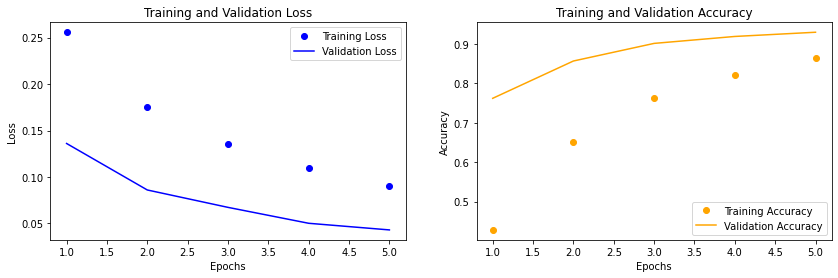

In [ ]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(14, 4))

plt.subplot(1,2,1)
plt.plot(epochs, loss_values, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

acc = history_dict['acc']
val_acc = history_dict['val_acc']

epochs = range(1, len(loss_values) + 1)

plt.subplot(1,2,2)
plt.plot(epochs, acc, 'bo', label='Training Accuracy', c='orange')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy', c='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

##3.2 VGG16

VGG16 is a convolution neural net (CNN ) architecture which was used to win ILSVR(Imagenet) competition in 2014. It is considered to be one of the excellent vision model architecture till date. Most unique thing about VGG16 is that instead of having a large number of hyper-parameter they focused on having convolution layers of 3x3 filter with a stride 1 and always used same padding and maxpool layer of 2x2 filter of stride 2. It follows this arrangement of convolution and max pool layers consistently throughout the whole architecture. In the end it has 2 FC(fully connected layers) followed by a softmax for output. The 16 in VGG16 refers to it has 16 layers that have weights. This network is a pretty large network and it has about 138 million (approx) parameters




##Model Creation

Next, let's load VGG16 with just the convolutional layers and not the dense layers so we can train our new dataset on the new dense layers that we create

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input

In [ ]:
vgg16_conv_base = VGG16(weights='imagenet', # importing weights 
                     include_top=False, # the last layer of the ResNet model is not included
                     input_shape=(256, 256, 3)) # input shape of the image

58892288/58889256 [==============================] - 1s 0us/step


The summary shows the state of art architecture of the vgg16 model.

In [ ]:
vgg16_conv_base.summary() 

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0     

To train our model on the new dataset above, the architecture for everything besides the VGG16 portion has changed. To begin with, the input image of Cifar10 is 32x32 so it needs to be upscaled 3 times before we can pass it through the VGG layers. After the images go through VGG, we flatten our processed input and pass it though 2 dense layers (with 128 and 64 neurons respectively). Each layer has batch normalization beforehand and dropout coming out before the last layer, with softmax and 10 neurons.

Added layers and changed architecture

In [ ]:
model = models.Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(vgg16_conv_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())  # batchnormalization for speeind up the math 
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer=optimizers.RMSprop(lr=2e-5), loss='binary_crossentropy', metrics=['acc'])

history = model.fit(x_train, y_train, epochs=5, batch_size=20, validation_split=0.2)

Epoch 1/5

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

2000/2000 [==============================] - 1851s 925ms/step - loss: 0.3354 - acc: 0.2200 - val_loss: 0.2679 - val_acc: 0.3552
Epoch 2/5
2000/2000 [==============================] - 1855s 928ms/step - loss: 0.2807 - acc: 0.3474 - val_loss: 0.2295 - val_acc: 0.4726
Epoch 3/5
2000/2000 [==============================] - 1854s 927ms/step - loss: 0.2528 - acc: 0.4218 - val_loss: 0.2198 - val_acc: 0.4940
Epoch 4/5
2000/2000 [==============================] - 1849s 925ms/step - loss: 0.2318 - acc: 

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 118s 377ms/step - loss: 0.2014 - acc: 0.5524


[0.20144778490066528, 0.5523999929428101]

Accuracy of the model is 55.24.

The model can be tuned more.

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
up_sampling2d (UpSampling2D) multiple                  0         
_________________________________________________________________
up_sampling2d_1 (UpSampling2 multiple                  0         
_________________________________________________________________
up_sampling2d_2 (UpSampling2 multiple                  0         
_________________________________________________________________
vgg16 (Model)                (None, 8, 8, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            multiple                  0         
_________________________________________________________________
batch_normalization (BatchNo multiple                  131072    
_________________________________________________________________
dense (Dense)                multiple                  4

##Visualization for VGG16

The training/validation loss and accuracy visualizations are shown below

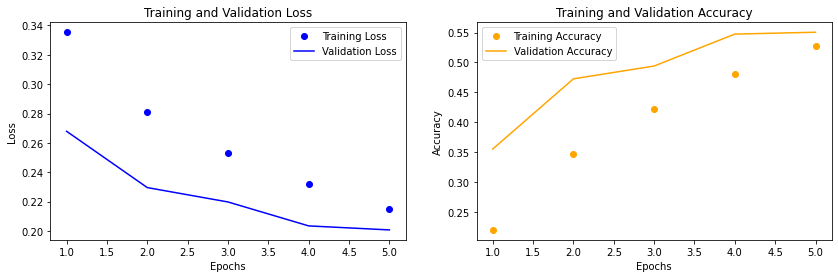

In [ ]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(14, 4))

plt.subplot(1,2,1)
plt.plot(epochs, loss_values, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

acc = history_dict['acc']
val_acc = history_dict['val_acc']

epochs = range(1, len(loss_values) + 1)

plt.subplot(1,2,2)
plt.plot(epochs, acc, 'bo', label='Training Accuracy', c='orange')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy', c='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

##3.3 Inception

Inceptionv3 is a convolutional neural network for assisting in image analysis and object detection, and got its start as a module for Googlenet. It is the third edition of Google's Inception Convolutional Neural Network, originally introduced during the ImageNet Recognition Challenge. Just as ImageNet can be thought of as a database of classified visual objects, Inception helps classification of objects in the world of computer vision.
Inception-v3 is a convolutional neural network is 48 layers deep.

##Model Creation

Next, let's load inceptionv3 with just the convolutional layers and not the dense layers so we can train our new dataset on the new dense layers that we create

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input

In [ ]:
inceptionv3_conv_base = InceptionV3(weights='imagenet', # importing weights 
                     include_top=False, # the last layer of the ResNet model is not included
                     input_shape=(256, 256, 3)) # input shape of the image

87916544/87910968 [==============================] - 1s 0us/step


The summary shows the state of art architecture of the inception v3 model.

In [ ]:
inceptionv3_conv_base.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 127, 127, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_3 (BatchNor (None, 127, 127, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 127, 127, 32) 0           batch_normalization_3[0][0]      
_______________________________________________________________________________________

To train our model on the new dataset above, the architecture for everything besides the inception portion has changed. To begin with, the input image of Cifar10 is 32x32 so it needs to be upscaled 3 times before we can pass it through the inception layers. After the images go through inception layers, we flatten our processed input and pass it though 2 dense layers (with 128 and 64 neurons respectively). Each layer has batch normalization beforehand and dropout coming out before the last layer, with softmax and 10 neurons.

Added layers and changed architecture

In [ ]:
model = models.Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(inceptionv3_conv_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())  # batchnormalization for speeind up the math 
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer=optimizers.RMSprop(lr=2e-5), loss='binary_crossentropy', metrics=['acc'])

history = model.fit(x_train, y_train, epochs=5, batch_size=20, validation_split=0.2)

Epoch 1/5

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

2000/2000 [==============================] - 1216s 608ms/step - loss: 0.2262 - acc: 0.5177 - val_loss: 0.0822 - val_acc: 0.8714
Epoch 2/5
2000/2000 [==============================] - 1214s 607ms/step - loss: 0.1347 - acc: 0.7740 - val_loss: 0.0494 - val_acc: 0.9271
Epoch 3/5
2000/2000 [==============================] - 1213s 607ms/step - loss: 0.1029 - acc: 0.8497 - val_loss: 0.0385 - val_acc: 0.9418
Epoch 4/5
2000/2000 [==============================] - 1214s 607ms/step - loss: 0.0823 - acc: 

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 66s 212ms/step - loss: 0.0330 - acc: 0.9511


[0.033046502619981766, 0.9510999917984009]

Accuracy of the model is 95.10%

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
up_sampling2d_3 (UpSampling2 multiple                  0         
_________________________________________________________________
up_sampling2d_4 (UpSampling2 multiple                  0         
_________________________________________________________________
up_sampling2d_5 (UpSampling2 multiple                  0         
_________________________________________________________________
inception_v3 (Model)         (None, 6, 6, 2048)        21802784  
_________________________________________________________________
flatten_1 (Flatten)          multiple                  0         
_________________________________________________________________
batch_normalization_97 (Batc multiple                  294912    
_________________________________________________________________
dense_3 (Dense)              multiple                 

##Visualization for Inception

The training/validation loss and accuracy visualizations are shown below

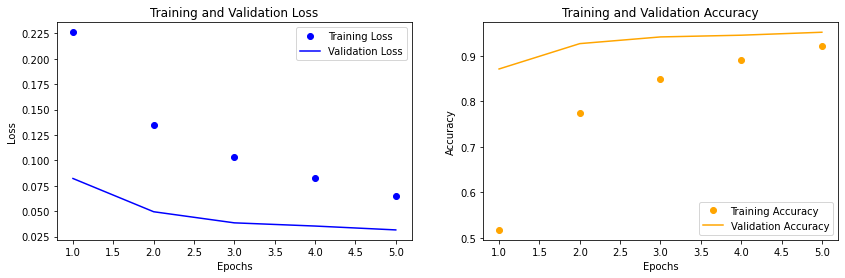

In [ ]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(14, 4))

plt.subplot(1,2,1)
plt.plot(epochs, loss_values, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

acc = history_dict['acc']
val_acc = history_dict['val_acc']

epochs = range(1, len(loss_values) + 1)

plt.subplot(1,2,2)
plt.plot(epochs, acc, 'bo', label='Training Accuracy', c='orange')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy', c='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

## Summary of pre trained models

1 Total parametes

    a ResNET 50  41 million (appox)

    b VGG16  19 million (approx)

    c Inception V3  31.5 million (approx)




2 Traning time

    a ResNET 50  2.5 hrs

    b VGG16  2.5 hrs

    c Inception V3  1.75 hrs



3 Accuracy

    a ResNET 50  92.40%

    b VGG16   55.24%

    c Inception V3  95.10%





---



##4 Image generation

## What is Image generation

Image generation means to manipulate an image example flipping, zooming, rotating etc.

## Why do we use image generation

1 training a small data, by augmentation we increase the number of images.

2 making a model more robust.


fit_generator for training Keras a model using Python data generators

ImageDataGenerator for real-time data augmentation

layer freezing and model fine-tuning

visit link for details.

https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html

In the model of few training examples, we will "augment" them via a number of random transformations, so that our model would never see twice the exact same picture. This helps prevent overfitting and helps the model generalize better.

In Keras this can be done via the keras.preprocessing.image.ImageDataGenerator class. This class allows you to:

configure random transformations and normalization operations to be done on your image data during training
instantiate generators of augmented image batches (and their labels) via .flow(data, labels) or .flow_from_directory(directory). These generators can then be used with the Keras model methods that accept data generators as inputs, fit_generator, evaluate_generator and predict_generator.

In [ ]:
from keras import applications
from keras.preprocessing.image import ImageDataGenerator #for real time augmentation of image
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense

Using TensorFlow backend.


In [ ]:
from keras.datasets import cifar10
from keras.utils import np_utils

In [ ]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img  # imagedatagenerator for generating image 


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape= (32, 32, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# the model so far outputs 3D feature maps (height, width, features)

In [ ]:
model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    shear_range=0.2,
    zoom_range=0.2,)

# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
datagen.fit(x_train)
# fits the model on batches with real-time data augmentation:
model.fit_generator(datagen.flow(x_train, 
                                 y_train,
                                 batch_size=32),
                    steps_per_epoch=len(x_train) / 32,
                    validation_data = (x_test, y_test),
                    epochs=5)

170500096/170498071 [==============================] - 11s 0us/step
Epoch 1/5
1563/1562 [==============================] - 48s 31ms/step - loss: 0.2742 - accuracy: 0.9013 - val_loss: 1.6525 - val_accuracy: 0.8707
Epoch 2/5
1563/1562 [==============================] - 42s 27ms/step - loss: 0.2437 - accuracy: 0.9075 - val_loss: 1.8681 - val_accuracy: 0.8607
Epoch 3/5
1563/1562 [==============================] - 42s 27ms/step - loss: 0.2313 - accuracy: 0.9117 - val_loss: 1.6885 - val_accuracy: 0.8728
Epoch 4/5
1563/1562 [==============================] - 42s 27ms/step - loss: 0.2237 - accuracy: 0.9151 - val_loss: 1.7462 - val_accuracy: 0.8654
Epoch 5/5
1563/1562 [==============================] - 42s 27ms/step - loss: 0.2200 - accuracy: 0.9173 - val_loss: 2.1007 - val_accuracy: 0.8501


In [ ]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 108us/step


[2.1007317916870116, 0.8500598669052124]

The accuracy is 85%.

## Using Pre trained model with image generator

Here we are only using Inception V3 becuase because Inception V3 gave the best performance when we had used transfer learning.

##Inception V3

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input

In [ ]:
inceptionv3_conv_base = InceptionV3(weights='imagenet', # importing weights 
                     include_top=False, # the last layer of the ResNet model is not included
                     input_shape=(256, 256, 3)) # input shape of the image

In [ ]:
from tensorflow.keras import models, layers
from tensorflow.keras import optimizers
model = models.Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(inceptionv3_conv_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(10, activation='softmax'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    shear_range=0.2,
    zoom_range=0.2,)

# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
datagen.fit(x_train)
# fits the model on batches with real-time data augmentation:
model.fit_generator(datagen.flow(x_train, 
                                 y_train,
                                 batch_size=32),
                    steps_per_epoch=len(x_train) / 32,
                    validation_data = (x_test, y_test),
                    epochs=5)

Epoch 1/5
1563/1562 [==============================] - 1283s 821ms/step - loss: 0.3262 - accuracy: 0.1440 - val_loss: 2.7607 - val_accuracy: 0.1000
Epoch 2/5
1563/1562 [==============================] - 1277s 817ms/step - loss: 0.2741 - accuracy: 0.2870 - val_loss: 2.7593 - val_accuracy: 0.1000
Epoch 3/5
1563/1562 [==============================] - 1278s 818ms/step - loss: 0.2508 - accuracy: 0.3745 - val_loss: 0.5656 - val_accuracy: 0.0927
Epoch 4/5
1563/1562 [==============================] - 1279s 819ms/step - loss: 0.2338 - accuracy: 0.4437 - val_loss: 2.0864 - val_accuracy: 0.1051
Epoch 5/5
1563/1562 [==============================] - 1281s 819ms/step - loss: 0.2165 - accuracy: 0.5096 - val_loss: 1.8154 - val_accuracy: 0.0978


In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 84s 270ms/step - loss: 1.8154 - accuracy: 0.0978


[1.8154104948043823, 0.09780000150203705]

The accuracy is only 9% and model has overfitted.

when we used image generation, we could see that the model has overfitted. So, it can be concluded that image generation is good for small datasets.

So the best model is using transfer learning with Inception V3 and adding custom layers to geta accuracy of 95%